This notebook consists of several parts:
- Loading in the data
- Data Familiarization
- Normalization
- PCA
- Collective Anomaly Example
- Point and Contextual Anomalies

# Part 1: Loading in the data

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from sklearn import preprocessing

np.random.seed(42)
train_data = './data/lab1_train.csv' # Change this to the path where you have your data stored.
test_data = './data/lab1_test.csv' # Change this to the path where you have your data stored.
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'], format='%d/%m/%Y %I:%M:%S %p', errors='coerce')
test_df['Timestamp'] = pd.to_datetime(test_df['Timestamp'], format='%d/%m/%Y %I:%M:%S %p', errors='coerce')
# drop rows with NaN values
train_df = train_df.dropna()
test_df = test_df.dropna()
# create dataframes with just the sensor data
train_df_no_time = train_df.drop(columns=['Timestamp', 'Normal/Attack']).dropna()
test_df_no_time = test_df.drop(columns=['Timestamp', 'Normal/Attack'])
print(train_df.head())


            Timestamp    FIT101    LIT101  MV101  P101  P102    AIT201  \
0 2015-12-22 16:00:00  2.470294  261.5804      2     2     1  244.3284   
1 2015-12-22 16:00:01  2.457163  261.1879      2     2     1  244.3284   
2 2015-12-22 16:00:02  2.439548  260.9131      2     2     1  244.3284   
3 2015-12-22 16:00:03  2.428338  260.2850      2     2     1  244.3284   
4 2015-12-22 16:00:04  2.424815  259.8925      2     2     1  244.4245   

    AIT202   AIT203    FIT201  ...  P501  P502    PIT501  PIT502    PIT503  \
0  8.19008  306.101  2.471278  ...     1     1  10.02948     0.0  4.277749   
1  8.19008  306.101  2.468587  ...     1     1  10.02948     0.0  4.277749   
2  8.19008  306.101  2.467305  ...     1     1  10.02948     0.0  4.277749   
3  8.19008  306.101  2.466536  ...     1     1  10.02948     0.0  4.277749   
4  8.19008  306.101  2.466536  ...     1     1  10.02948     0.0  4.277749   

     FIT601  P601  P602  P603  Normal/Attack  
0  0.000256     1     1     1         N

# Part 1: Normalization

In this part, different normalization techniques will be explored, that can be used as preprocessing steps.
All examples will be based on the FIT101 signal.

## Standardization Transformation

In [18]:
# Train Data
standard_scaler = preprocessing.StandardScaler()
train_norm = standard_scaler.fit_transform(train_df_no_time.to_numpy())
train_norm = pd.DataFrame(train_norm, columns=train_df_no_time.columns)

# Test Data
test_norm = standard_scaler.transform(test_df_no_time.to_numpy())
test_norm = pd.DataFrame(test_norm, columns=test_df_no_time.columns)

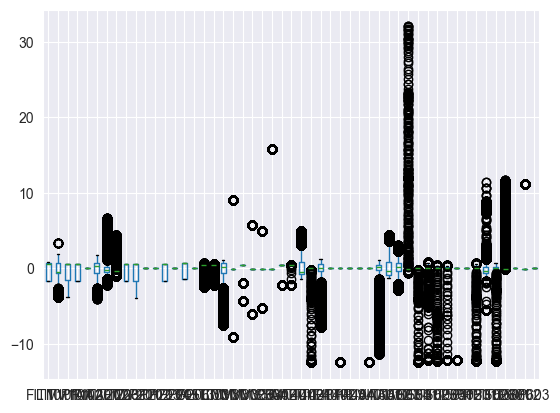

In [19]:
train_norm.boxplot()
plt.show()

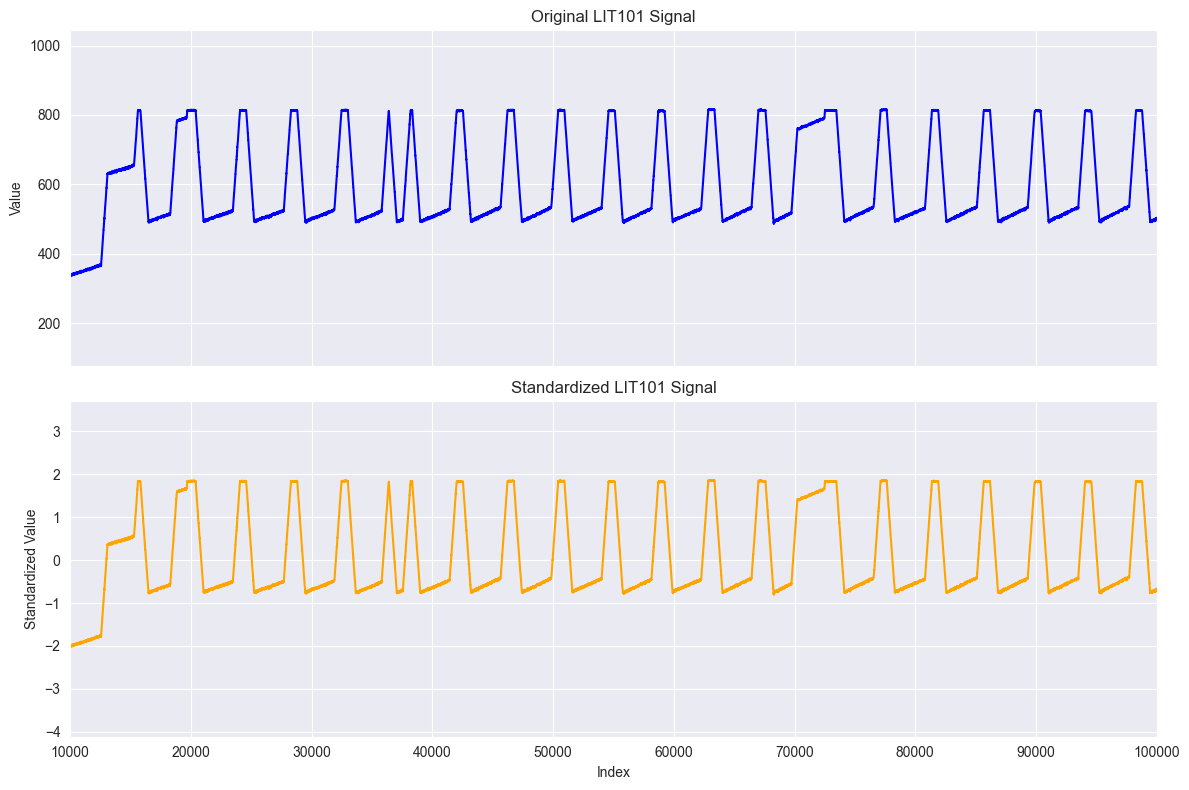

In [39]:
# Train Data
# PLOT the FIT101 signal before and after standardization next to each other in a larger figure
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
axes[0].plot(train_df['LIT101'], color='blue')
axes[0].set_title('Original LIT101 Signal')
axes[0].set_xlim(10000, 100000)
axes[0].set_ylabel('Value')
axes[0].grid(True)
axes[1].plot(train_norm['LIT101'], color='orange')
axes[1].set_title('Standardized LIT101 Signal')
axes[1].set_xlim(10000, 100000)
axes[1].set_ylabel('Standardized Value')
axes[1].grid(True)
plt.xlabel('Index')
plt.tight_layout()
plt.show()

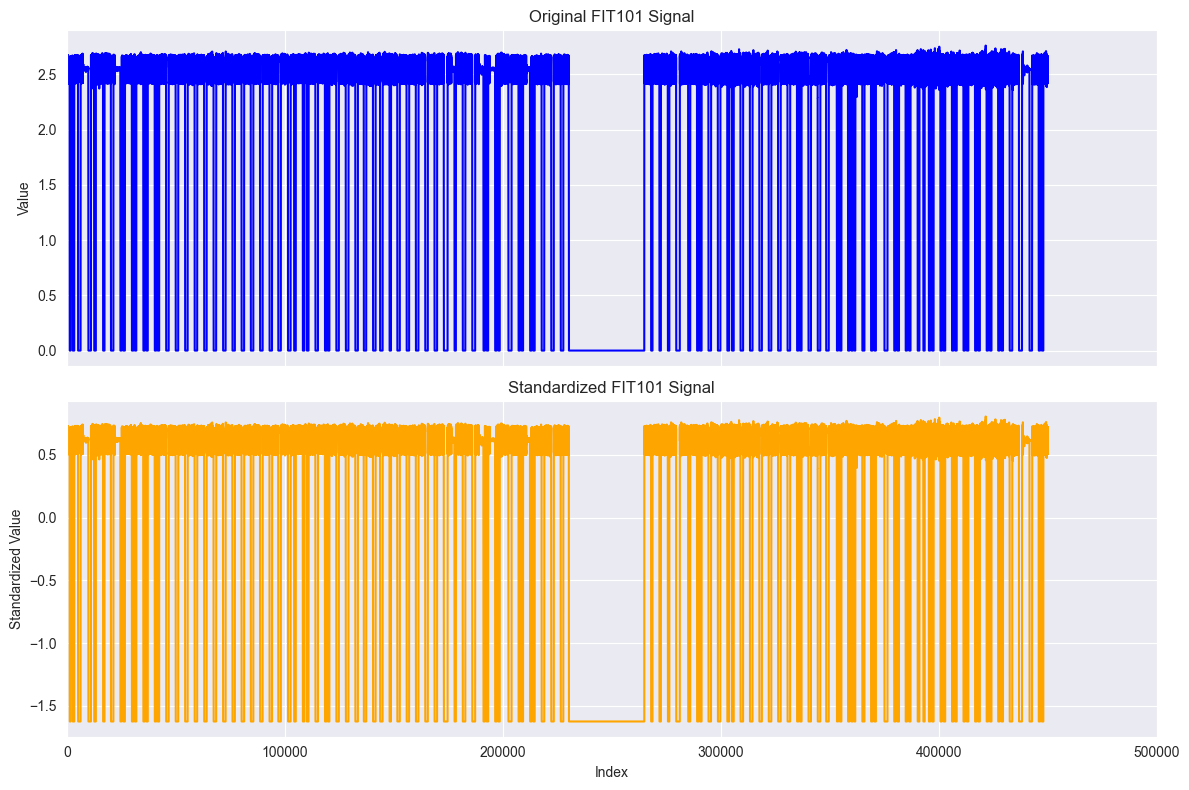

In [21]:
# Test Data
# PLOT the FIT101 signal before and after standardization next to each other.
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
axes[0].plot(test_df['FIT101'], color='blue')
axes[0].set_title('Original FIT101 Signal')
axes[0].set_xlim(0, 500000)
axes[0].set_ylabel('Value')
axes[0].grid(True)
axes[1].plot(test_norm['FIT101'], color='orange')
axes[1].set_title('Standardized FIT101 Signal')
axes[1].set_xlim(0, 500000)
axes[1].set_ylabel('Standardized Value')
axes[1].grid(True)
plt.xlabel('Index')
plt.tight_layout()
plt.show()

## Quantile Transformation



In [34]:
# Train Data
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
train_trans = quantile_transformer.fit_transform(train_df_no_time.to_numpy())
train_trans = pd.DataFrame(train_trans, columns=train_df_no_time.columns)

# Test Data
test_trans = quantile_transformer.transform(test_df_no_time.to_numpy())
test_trans = pd.DataFrame(test_trans, columns=test_df_no_time.columns)

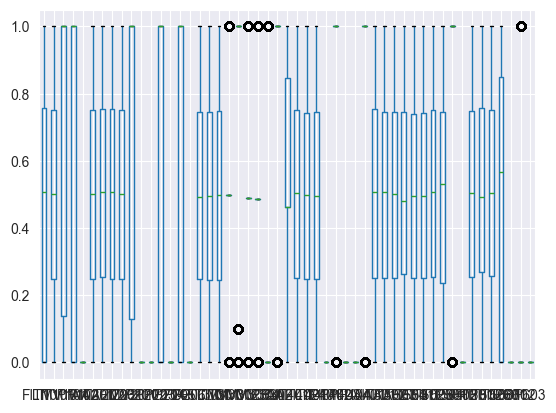

In [35]:
train_trans.boxplot()
plt.show()

## Scatter plots

Scatter plots of the original data and the standardized data example.

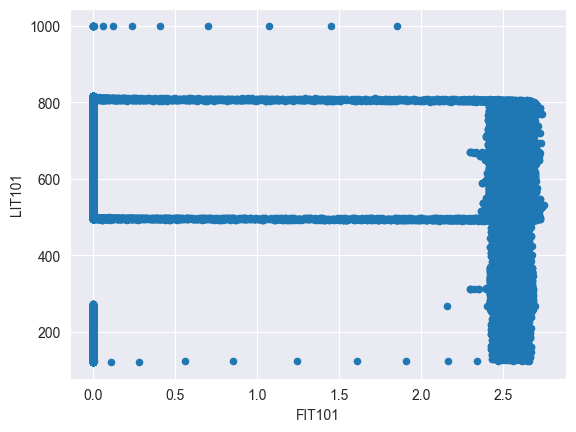

In [23]:
train_df.plot.scatter(x="FIT101",y="LIT101")
plt.show()

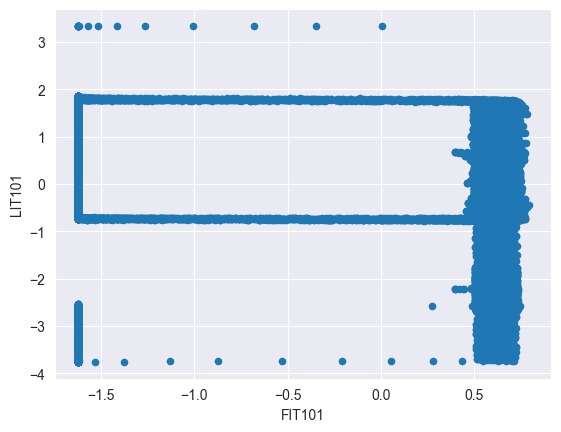

In [24]:
train_norm.plot.scatter(x="FIT101",y="LIT101")
plt.show()

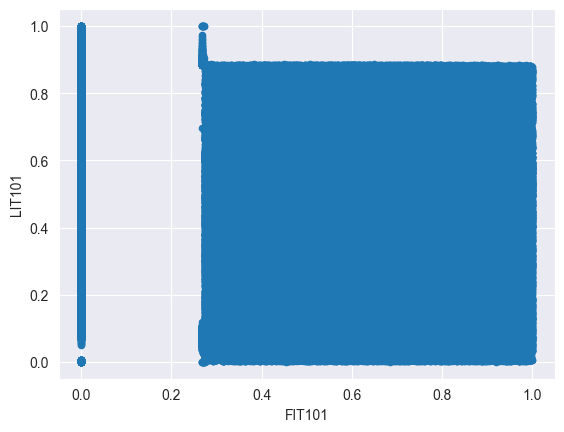

In [25]:
train_trans.plot.scatter(x="FIT101",y="LIT101")
plt.show()

## Correlation matrices

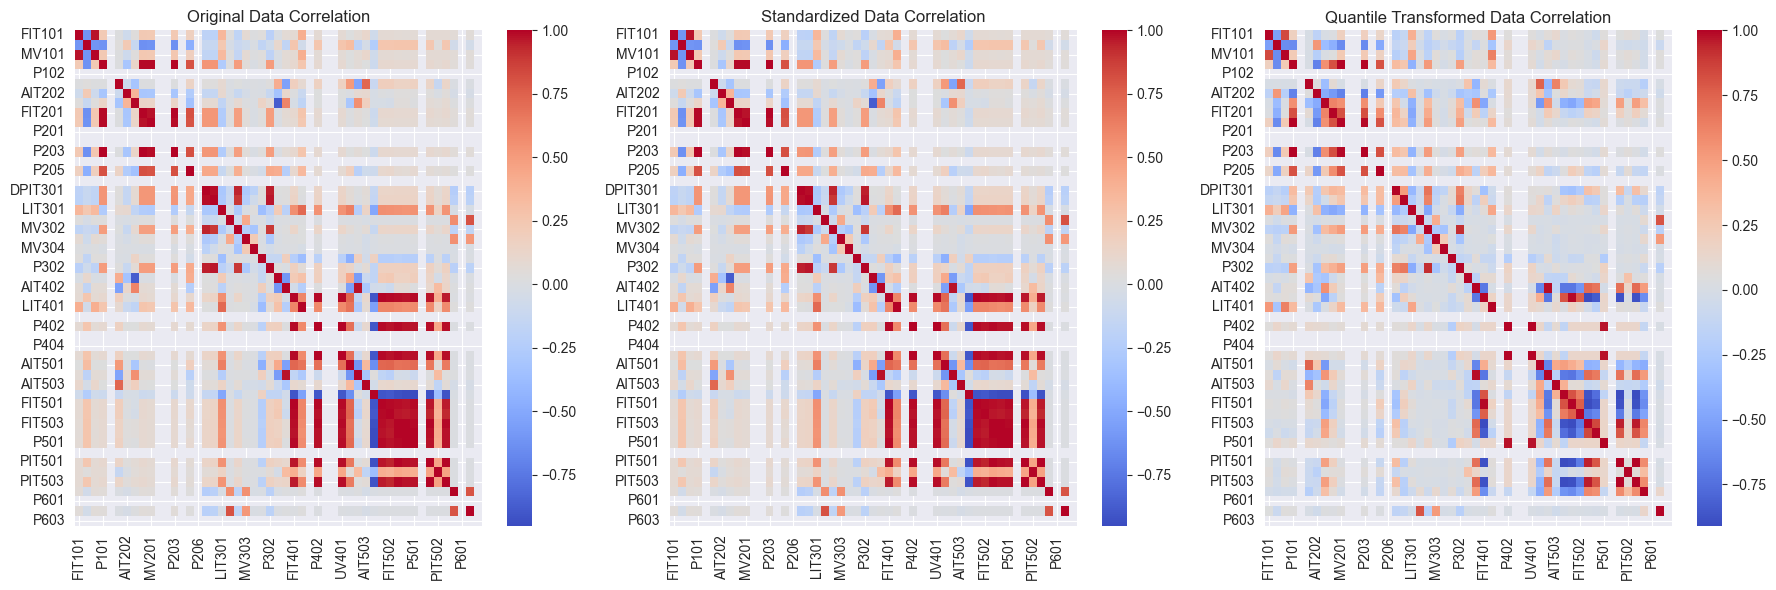

In [26]:
# Here are the 3 different correlation matrices for the original, standardized and quantile transformed data in 1 figure.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
correlation_original = train_df_no_time.corr()
sns.heatmap(correlation_original, annot=False, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Original Data Correlation')
correlation_standardized = train_norm.corr()
sns.heatmap(correlation_standardized, annot=False, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Standardized Data Correlation')
correlation_quantile = train_trans.corr()
sns.heatmap(correlation_quantile, annot=False, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Quantile Transformed Data Correlation')
plt.tight_layout()
plt.show()

## ECDF plots

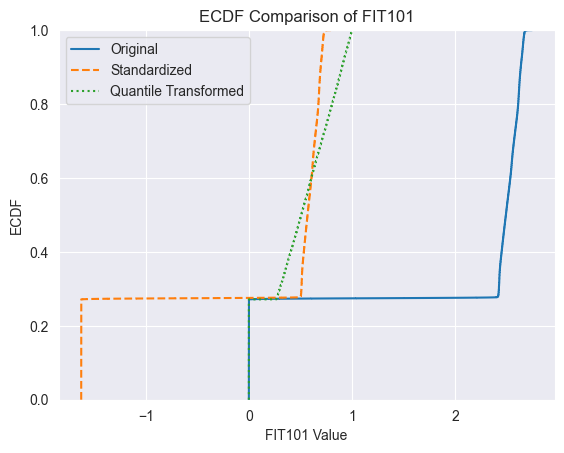

In [27]:
# compare the ECDF plots of the original and standardized data
sns.ecdfplot(data=train_df,x="FIT101", label='Original', linestyle='-')
sns.ecdfplot(data=train_norm,x="FIT101", label='Standardized', linestyle='--')
sns.ecdfplot(data=train_trans,x="FIT101", label='Quantile Transformed', linestyle=':')
plt.xlabel('FIT101 Value')
plt.ylabel('ECDF')
plt.title('ECDF Comparison of FIT101')
plt.legend()
plt.show()

## Box-Cox Transformation

https://scikit-learn.org/stable/modules/preprocessing.html#box-cox-transform

Minimum value of LIT101: 120.6237


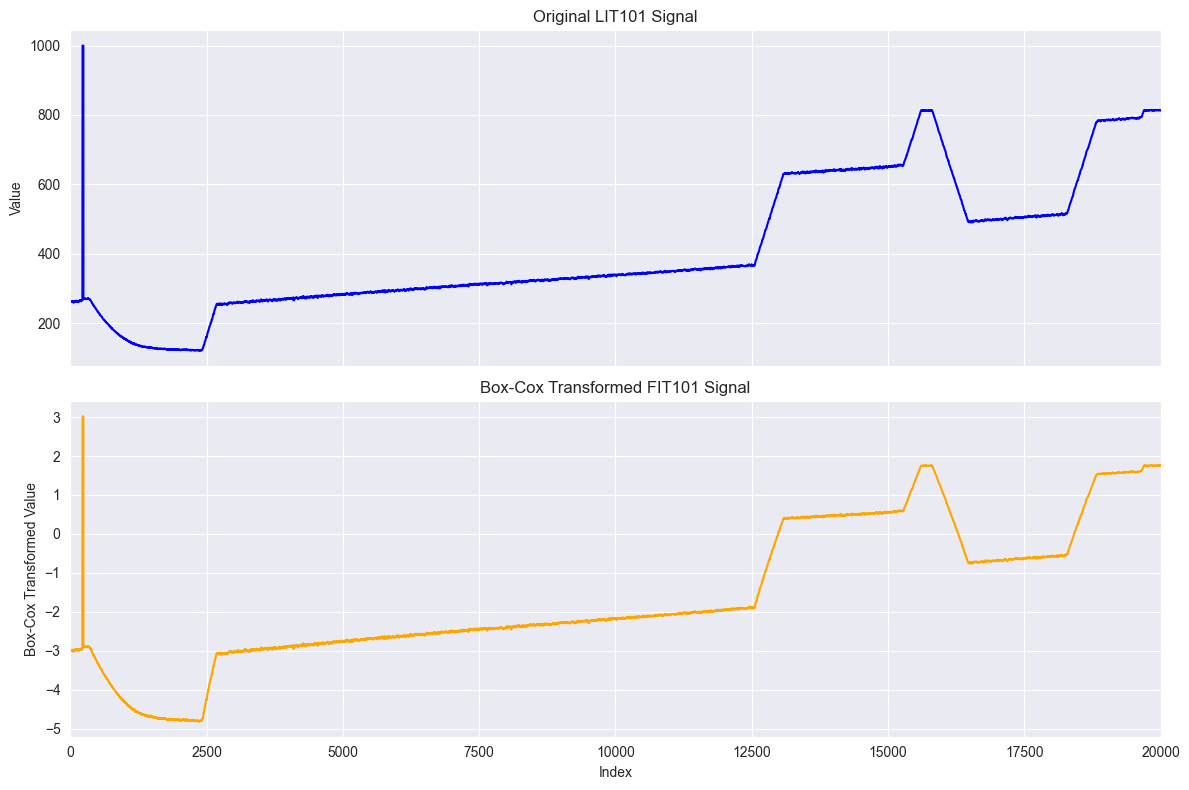

In [42]:
# box-cox normal transformation of FIT101
pt = preprocessing.PowerTransformer(method='box-cox')
fit_data = train_df_no_time[['LIT101']].copy()

# Box-Cox requires all positive data, so we shift the data if necessary
min_value = fit_data['LIT101'].min()
print(f"Minimum value of LIT101: {min_value}")
if min_value <= 0:
    fit_data['LIT101'] = fit_data['LIT101'] - min_value + 1e-6  # Shift to make all values positive
fit_transformed = pt.fit_transform(fit_data)
fit_transformed_df = pd.DataFrame(fit_transformed, columns=['LIT101_BoxCox'])

# Plot the original and Box-Cox transformed data
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
axes[0].plot(train_df['LIT101'], color='blue')
axes[0].set_title('Original LIT101 Signal')
axes[0].set_xlim(0, 20000)
axes[0].set_ylabel('Value')
axes[0].grid(True)

axes[1].plot(fit_transformed_df['LIT101_BoxCox'], color='orange')
axes[1].set_title('Box-Cox Transformed FIT101 Signal')
axes[1].set_xlim(0, 20000)
axes[1].set_ylabel('Box-Cox Transformed Value')
axes[1].grid(True)
plt.xlabel('Index')
plt.tight_layout()
plt.show()


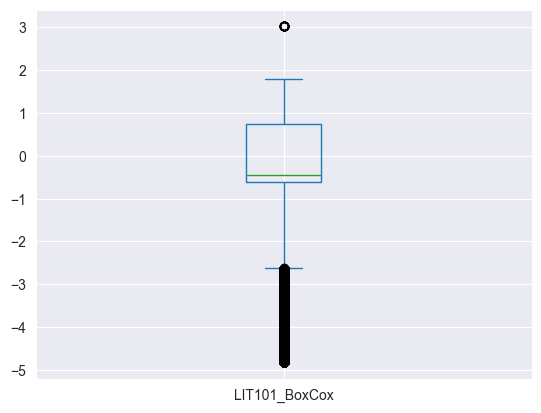

In [43]:
fit_transformed_df['LIT101_BoxCox'].plot.box()
plt.show()

# Part 2: Data Familiarization

Let's visualize some plots to get a feel for the data. There are various different types of data.

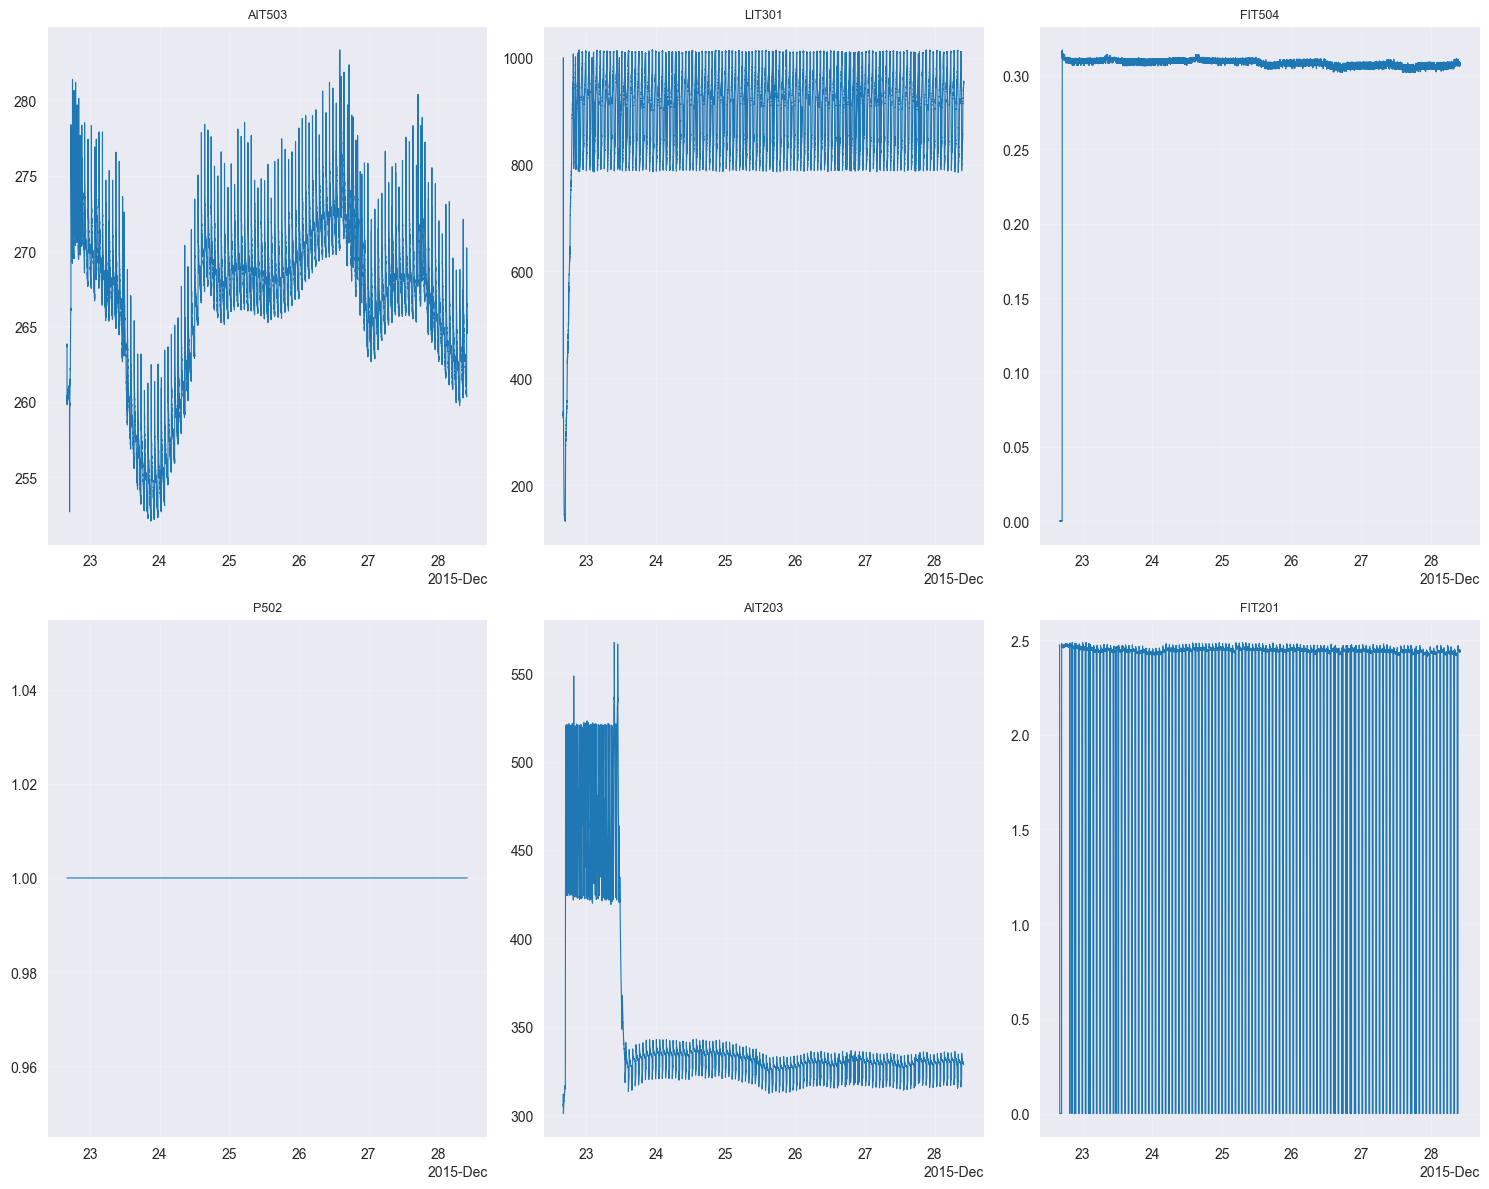

In [5]:
plots = [ "AIT503", "LIT301", "FIT504", "P502", "AIT203", "FIT201"]
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
axes = axes.ravel()

for i, ax in enumerate(axes):
    col = plots[i]
    ax.plot(train_df['Timestamp'], train_df[col], linewidth=0.8)
    ax.set_title(col, fontsize=9)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
    ax.tick_params(axis='x')
    ax.grid(alpha=0.2)

plt.tight_layout()
plt.show()

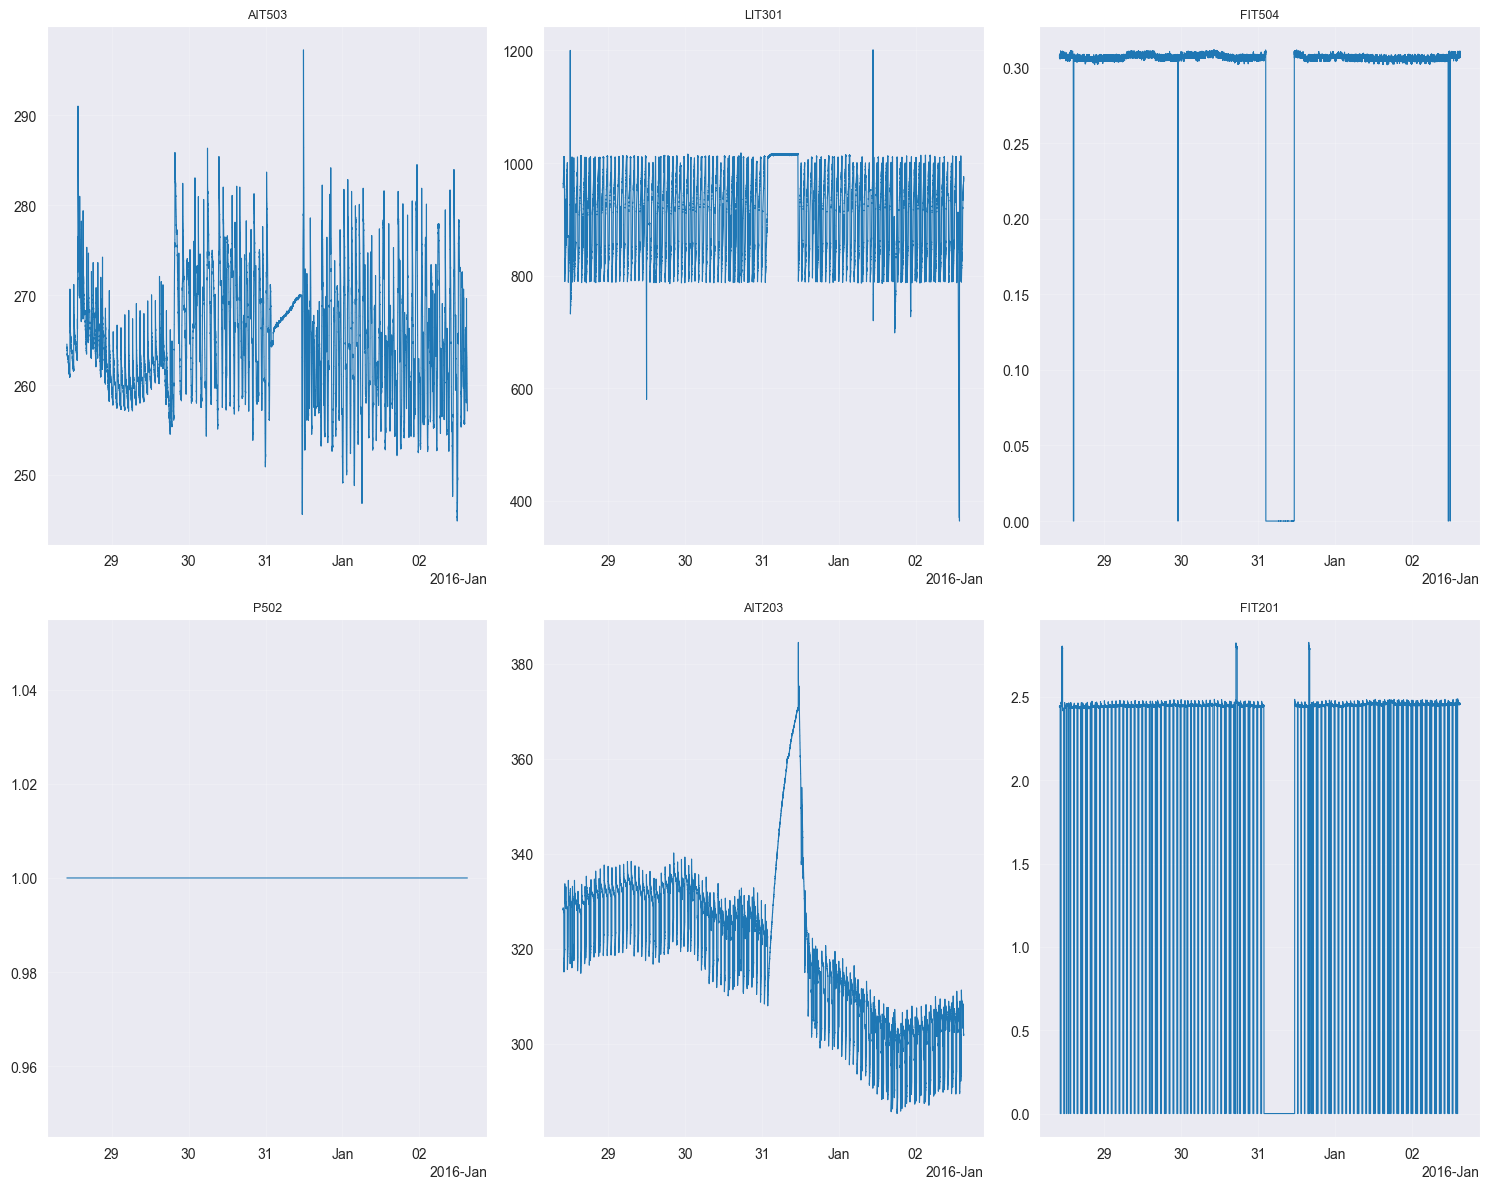

In [46]:
plots = [ "AIT503", "LIT301", "FIT504", "P502", "AIT203", "FIT201"]
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
axes = axes.ravel()

for i, ax in enumerate(axes):
    col = plots[i]
    ax.plot(test_df['Timestamp'], test_df[col], linewidth=0.8)
    ax.set_title(col, fontsize=9)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
    ax.tick_params(axis='x')
    ax.grid(alpha=0.2)

plt.tight_layout()
plt.show()

As you can see above, there are lots of different types of signals. Some are continuous, some cyclical and some constant.

<Axes: >

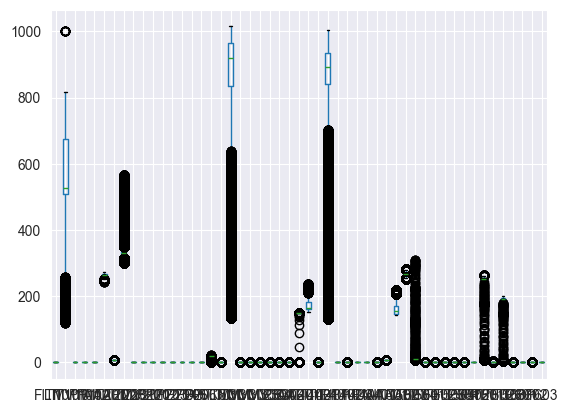

In [20]:
train_df.boxplot()

## Correlation between signals

Let's explore correlation between different signals. We start first of all by computing the correlation matrix.

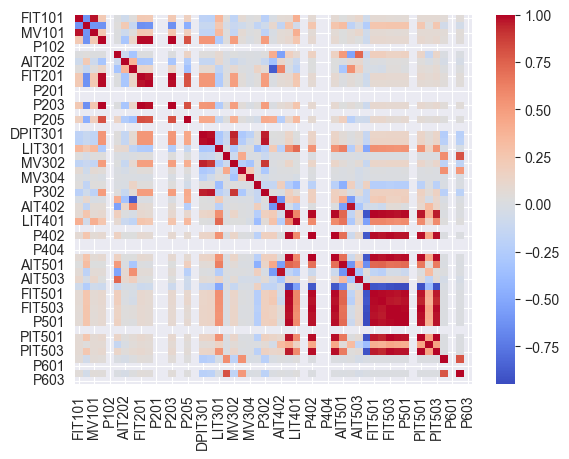

In [55]:
correlation_df = train_df_no_time.corr()
sns.heatmap(correlation_df, cmap='coolwarm', annot=False)
plt.show()

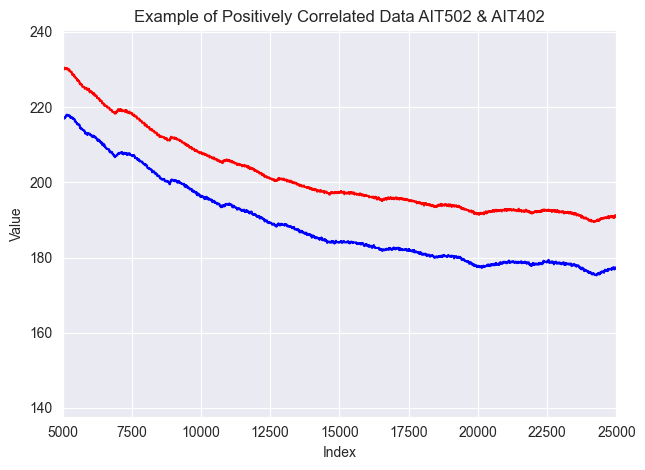

          AIT502    AIT402
AIT502  1.000000  0.976783
AIT402  0.976783  1.000000


In [52]:
# Let's look closely at 2 signals. AIT502 vs AIT402 and FIT501 vs AIT504
y1 = train_df['AIT502']
y2 = train_df['AIT402']
plt.plot(y1, label='AIT[502]', color='blue')
plt.plot(y2, label='LIT[402]', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Example of Positively Correlated Data AIT502 & AIT402')
plt.tight_layout()
plt.xlim(5_000,25_000)
plt.grid(True)
plt.show()

correlation_data = correlation_df[['AIT502', 'AIT402']]
print(correlation_data.loc[['AIT502', 'AIT402']])

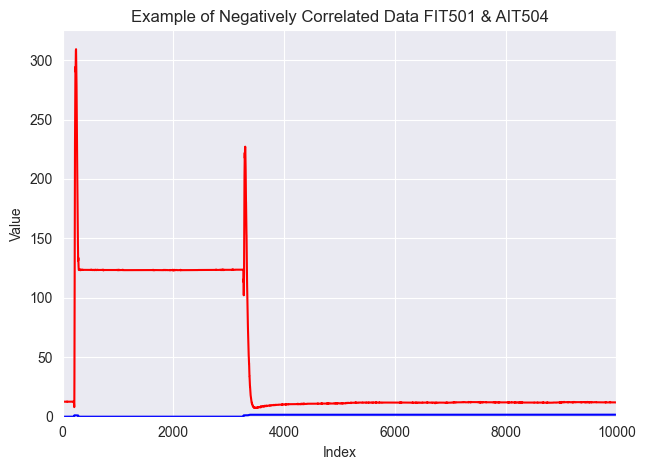

          FIT501    AIT504
FIT501  1.000000 -0.910065
AIT504 -0.910065  1.000000


In [59]:
# Here is an example of negatively correlated data
y1 = train_df['FIT501']
y2 = train_df['AIT504']
plt.plot(y1, label='FIT501', color='blue')
plt.plot(y2, label='AIT504', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Example of Negatively Correlated Data FIT501 & AIT504')
plt.tight_layout()
plt.xlim(0,10_000)
plt.ylim(0,325)
plt.grid(True)
plt.show()

correlation_data = correlation_df[['FIT501', 'AIT504']]
print(correlation_data.loc[['FIT501', 'AIT504']])

In [61]:
def signal_heatmap(train_df, signal= "LIT101", window_shape = 1000, start_index = 1000, end_index = -1):
    # Now we select a column (e.g., LIT101), generate sliding windows of size 20, and compute the correlation matrix between the windows.
    sig = train_df[signal].tolist()
    windows_data = []

    if (end_index == -1):
        end_index = len(sig)

    windows_data = np.lib.stride_tricks.sliding_window_view(sig[start_index:end_index], window_shape=window_shape)

    windows_df = pd.DataFrame(windows_data)
    windows_correlation_df = windows_df.corr(method="spearman")
    sns.heatmap(windows_correlation_df, annot=False, cmap='coolwarm')
    plt.show()

Heatmap of the signal FIT101

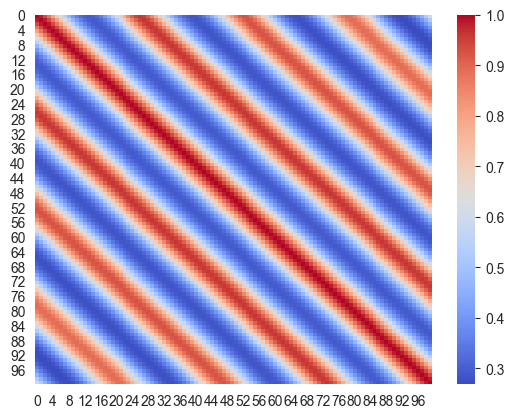

In [63]:
signal_heatmap(train_df,signal="FIT101", window_shape=100, start_index=1000)

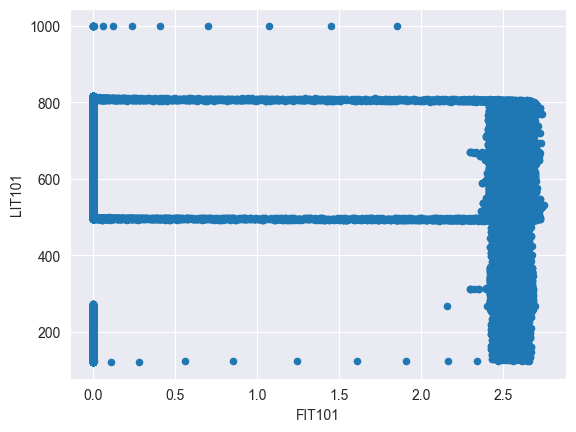

In [12]:
# Scatter plot of the normal train data
train_df.plot.scatter(x="FIT101",y="LIT101")
plt.show()

# Part 3: PCA

PCA on the original data

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train_df_no_time)
train_pca = pca.transform(train_df_no_time)
train_pca = pd.DataFrame(train_pca)

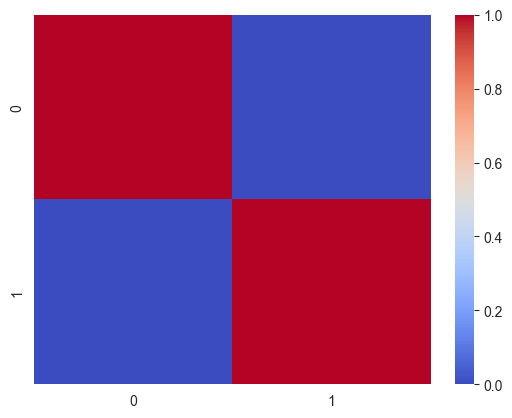

In [65]:
correlation_df = train_pca.corr()
sns.heatmap(correlation_df, annot=False, cmap='coolwarm')
plt.show()

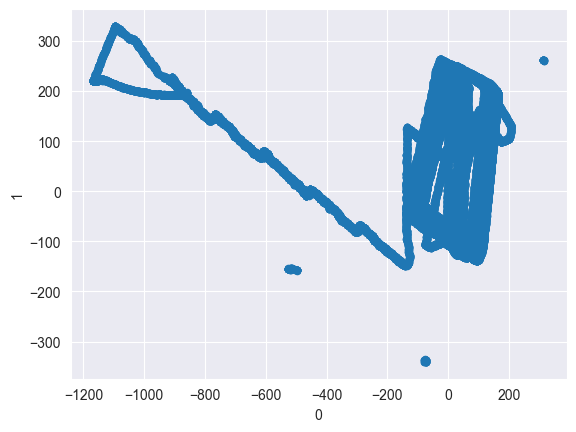

In [66]:
train_pca.plot.scatter(x=0,y=1)
plt.show()

In [67]:
standard_scaler = preprocessing.StandardScaler()
train_norm = standard_scaler.fit_transform(train_df_no_time.to_numpy())
train_norm = pd.DataFrame(train_norm, columns=train_df_no_time.columns)

standard_scaler = preprocessing.StandardScaler()
test_norm = standard_scaler.fit_transform(test_df_no_time.to_numpy())
test_norm = pd.DataFrame(test_norm, columns=test_df_no_time.columns)

In [61]:
train_norm

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0.550791,-2.619380,0.61403,0.582185,0.0,-4.013815,-2.191736,-0.852445,0.604947,0.575403,...,-12.073784,-12.158603,0.0,-12.228505,-5.452562,-12.167431,-0.094974,0.0,-0.089319,0.0
1,0.539226,-2.622548,0.61403,0.582185,0.0,-4.013815,-2.191736,-0.852445,0.602414,0.575403,...,-12.073784,-12.158603,0.0,-12.228505,-5.452562,-12.167431,-0.094974,0.0,-0.089319,0.0
2,0.523710,-2.624766,0.61403,0.582185,0.0,-4.013815,-2.191736,-0.852445,0.601207,0.575403,...,-12.073784,-12.158603,0.0,-12.228505,-5.452562,-12.167431,-0.094974,0.0,-0.089319,0.0
3,0.513837,-2.629836,0.61403,0.582185,0.0,-4.013815,-2.191736,-0.852445,0.600484,0.575403,...,-12.073784,-12.158603,0.0,-12.228505,-5.452562,-12.167431,-0.094974,0.0,-0.089319,0.0
4,0.510733,-2.633004,0.61403,0.582185,0.0,-3.993943,-2.191736,-0.852445,0.600484,0.575403,...,-12.073784,-12.158603,0.0,-12.228505,-5.452562,-12.167431,-0.094974,0.0,-0.089319,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496795,0.542047,-0.508961,0.61403,0.582185,0.0,-0.356267,0.095136,-0.399116,0.577688,0.575403,...,0.097721,0.082246,0.0,-0.005624,2.742084,-0.027232,-0.095836,0.0,-0.089319,0.0
496796,0.531891,-0.509595,0.61403,0.582185,0.0,-0.356267,0.095136,-0.399116,0.577688,0.575403,...,0.097721,0.082246,0.0,-0.005624,2.742084,-0.050292,-0.095836,0.0,-0.089319,0.0
496797,0.519479,-0.510228,0.61403,0.582185,0.0,-0.356267,0.095136,-0.396522,0.580100,0.575403,...,0.097721,0.082246,0.0,-0.005624,2.742084,-0.050292,-0.095836,0.0,-0.089319,0.0
496798,0.513837,-0.509912,0.61403,0.582185,0.0,-0.356267,0.095136,-0.396522,0.580582,0.575403,...,0.097721,0.082246,0.0,-0.005624,2.151477,-0.050292,-0.095836,0.0,-0.089319,0.0


In [62]:
test_norm

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0.598055,-0.671759,0.693861,0.66519,-0.083632,1.471045,-1.150243,0.501005,0.656905,0.655351,...,0.296326,0.282974,0.0,0.302690,1.542306,0.313488,-0.102994,0.0,-0.095828,0.0
1,0.614180,-0.671445,0.693861,0.66519,-0.083632,1.471045,-1.150243,0.501005,0.656905,0.655351,...,0.296326,0.282974,0.0,0.302690,1.542306,0.315175,-0.102994,0.0,-0.095828,0.0
2,0.650193,-0.671759,0.693861,0.66519,-0.083632,1.471045,-1.166987,0.501005,0.654184,0.655351,...,0.306616,0.282974,0.0,0.302949,1.542306,0.315175,-0.102994,0.0,-0.095828,0.0
3,0.688087,-0.670818,0.693861,0.66519,-0.083632,1.471045,-1.166987,0.501005,0.654184,0.655351,...,0.306616,0.282974,0.0,0.302949,1.542306,0.313825,-0.102994,0.0,-0.095828,0.0
4,0.717381,-0.666746,0.693861,0.66519,-0.083632,1.471045,-1.166987,0.501005,0.654865,0.655351,...,0.306616,0.282974,0.0,0.302949,1.542306,0.311464,-0.102994,0.0,-0.095828,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,0.709587,-0.698072,0.693861,0.66519,-0.083632,-1.200283,0.959112,-1.105097,0.669377,0.655351,...,0.281287,0.282974,0.0,0.307359,-0.359524,0.301339,-0.103797,0.0,-0.095828,0.0
449915,0.700449,-0.691180,0.693861,0.66519,-0.083632,-1.200283,0.959112,-1.105097,0.669377,0.655351,...,0.281287,0.282974,0.0,0.306062,-0.359524,0.299315,-0.103797,0.0,-0.095828,0.0
449916,0.685668,-0.688988,0.693861,0.66519,-0.083632,-1.200283,0.959112,-1.105097,0.669944,0.655351,...,0.281287,0.282974,0.0,0.306062,-0.359524,0.299315,-0.103797,0.0,-0.095828,0.0
449917,0.677068,-0.688674,0.693861,0.66519,-0.083632,-1.200283,0.959112,-1.105097,0.669944,0.655351,...,0.298701,0.282974,0.0,0.306062,-0.359524,0.299315,-0.103797,0.0,-0.095828,0.0


PCA on the standardized data

In [68]:
pca = PCA(n_components=2)
pca.fit(train_norm)
train_pca = pca.transform(train_norm)
train_pca = pd.DataFrame(train_pca)

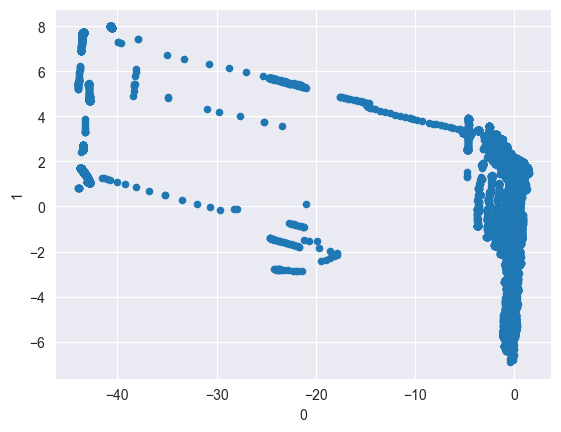

In [69]:
train_pca.plot.scatter(x=0,y=1)
plt.show()

PCA on the test standardized data

In [70]:
pca = PCA(n_components=2)
pca.fit(test_norm)
test_pca = pca.transform(test_norm)
test_pca = pd.DataFrame(test_pca)

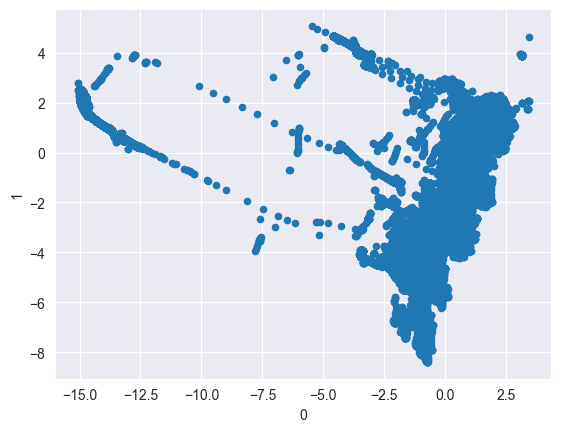

In [71]:
test_pca.plot.scatter(x=0, y=1)
plt.show()

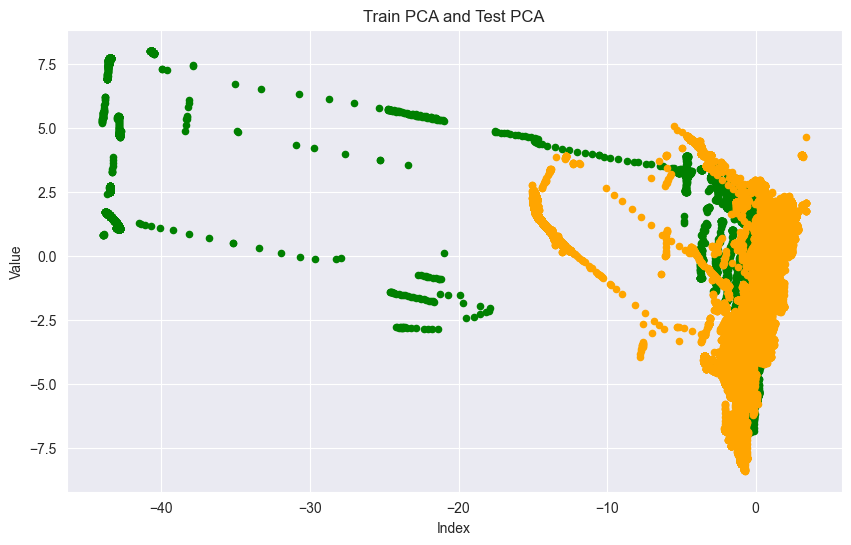

In [72]:
# Plot the test_pca and train_pca on top of each other in different colors
fig, ax = plt.subplots(figsize=(10, 6))
y1 = train_pca
y2 = test_pca
y1.plot.scatter(x=0, y=1,ax=ax, color='green')
y2.plot.scatter(x=0, y=1, color='orange',ax=ax)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Train PCA and Test PCA')
plt.grid(True)
plt.show()


In [76]:
scaler = preprocessing.StandardScaler()
cutoff=20_000
train_norm_np = scaler.fit_transform(train_df_no_time.to_numpy()[cutoff:])
test_norm_np = scaler.transform(test_df_no_time.to_numpy()[cutoff:])

In [77]:
pca = PCA(n_components=2)
pca.fit(train_norm_np)

train_pca = pca.fit_transform(train_norm_np)
train_pca = pd.DataFrame(train_pca, columns=['PC1', 'PC2'])
test_pca = pca.transform(test_norm_np)
test_pca = pd.DataFrame(test_pca, columns=['PC1', 'PC2'])

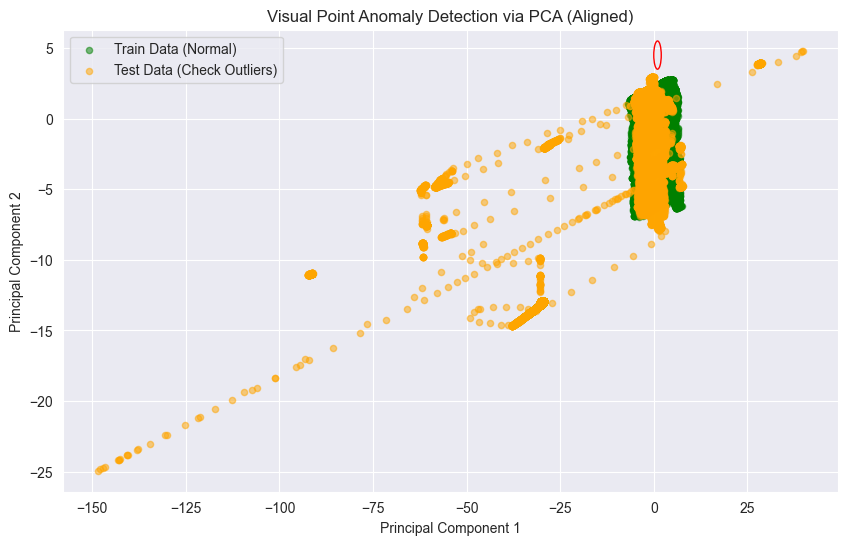

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))

# Use the column names (0 and 1) or 'PC1', 'PC2' if you named them
train_pca.plot.scatter(x='PC1', y='PC2', ax=ax, color='green', alpha=0.5, label='Train Data (Normal)')
test_pca.plot.scatter(x='PC1', y='PC2', ax=ax, color='orange', alpha=0.5, label='Test Data (Check Outliers)')
ax.add_patch(plt.Circle(xy=(1, 4.5), radius=1, color='r', fill=False))

# Fix labels to reflect the components, not Index/Value
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visual Point Anomaly Detection via PCA (Aligned)')
plt.legend(loc=0)
plt.grid(True)
plt.show()

# Part 4: Collective Anomaly Example

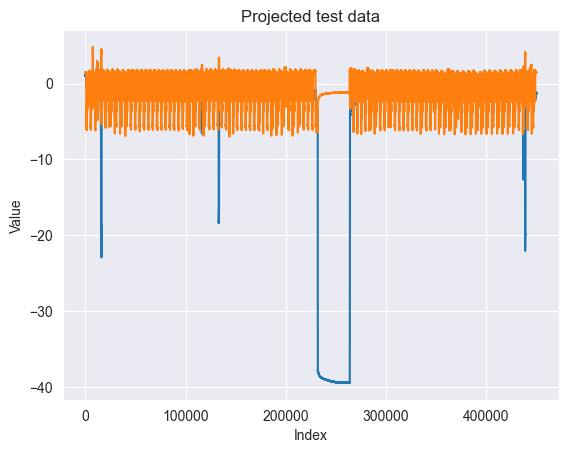

In [71]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(train_norm_np)
projected_test = pca.transform(test_norm_np)

plt.plot(projected_test)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Projected test data')
plt.grid(True)
plt.show()

# Part 5: Contextual anomalies

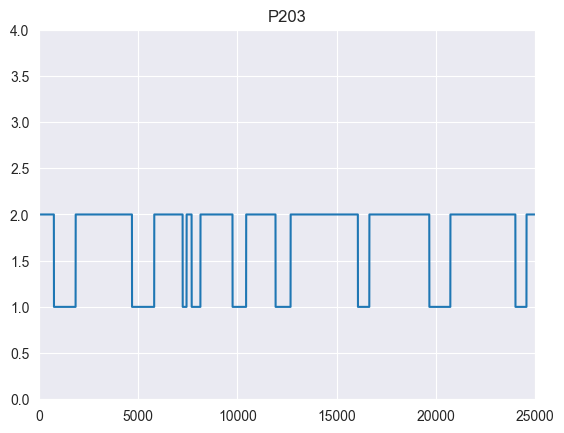

In [79]:
# plot all signals with range
x_range = [0, 25000]
y_range = [0, 4]
signal = "P203"

plt.plot(test_df_no_time[signal], label=signal)
plt.title(signal)
plt.xlim(x_range[0], x_range[1])
plt.ylim(y_range[0], y_range[1])
plt.show()



In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

WINDOW_SIZE = 500
signal = "P203"
x_range = [0, 20000] # The time steps/index range you want to process and plot
y_range = [0, 4]

start_index = x_range[0]
end_index = x_range[1]

X_test_series = test_df_no_time[signal].values
test_residuals = np.full(len(test_df_no_time), np.nan)

# --- 2. Sliding Window Loop Restricted to Range ---
for i in range(start_index, end_index - WINDOW_SIZE):
    # The current window starts at i and runs up to (i + WINDOW_SIZE)
    window_end_index = i + WINDOW_SIZE

    X_train_window = np.arange(WINDOW_SIZE - 1).reshape(-1, 1)
    y_train_window = X_test_series[i : window_end_index - 1]

    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train_window, y_train_window)

    # Define the prediction target (index W-1)
    X_pred = np.array([[WINDOW_SIZE - 1]])

    # Predict the last point and calculate the residual
    y_pred = model.predict(X_pred)[0]
    y_actual = X_test_series[window_end_index]
    residual = np.abs(y_actual - y_pred)

    test_residuals[window_end_index] = residual

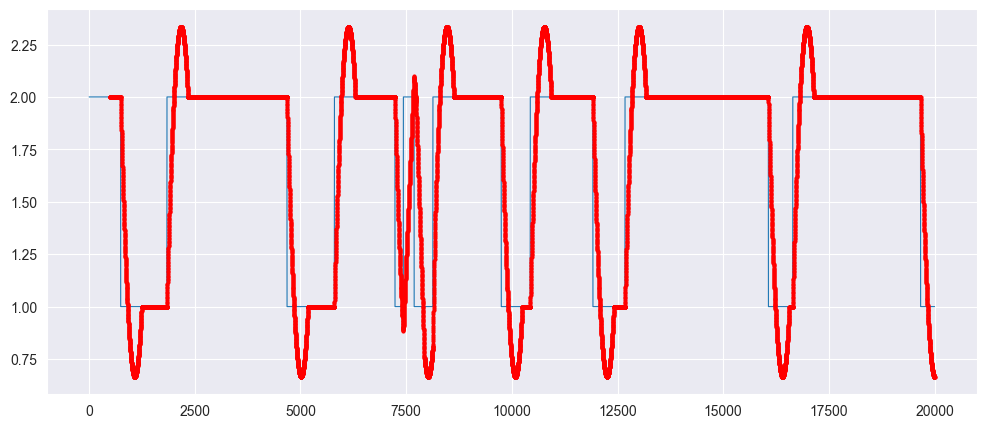

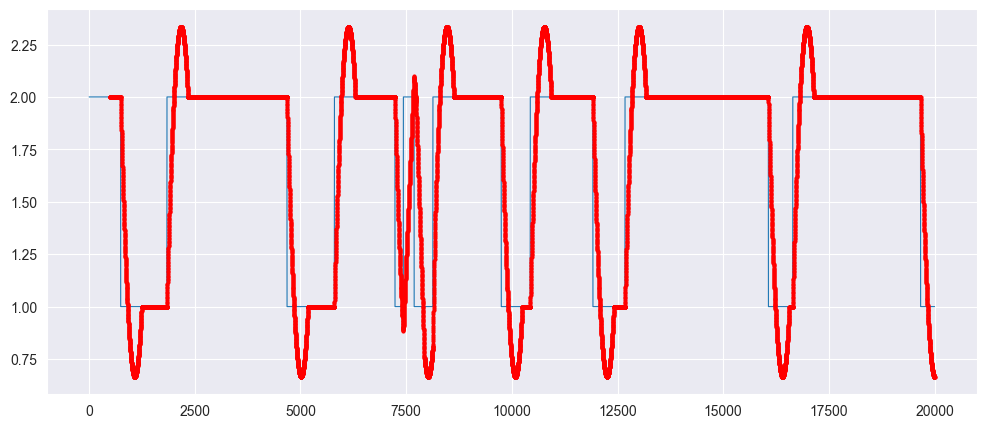

In [82]:
# Plot the predictions in the same graph as the signal
n= len(X_test_series)
test_preds = np.full(n, np.nan)
# sliding window: train on WINDOW_SIZE points and predict the next point
for i in range(x_range[0], x_range[1] - WINDOW_SIZE):
    window_start = i
    window_end = i + WINDOW_SIZE  # next index to predict will be window_end
    X_train = np.arange(WINDOW_SIZE).reshape(-1, 1)
    y_train = X_test_series[window_start:window_end]

    model = LinearRegression()
    model.fit(X_train, y_train)

    X_pred = np.array([[WINDOW_SIZE]])  # predict the next step after the window
    pred = model.predict(X_pred)[0]
    if window_end < n:
        test_preds[window_end] = pred

# plotting
fig, ax = plt.subplots(figsize=(12, 5))
x = np.arange(n)

# restrict to the requested display range
display_slice = slice(x_range[0], min(x_range[1], n))

ax.plot(x[display_slice], X_test_series[display_slice], label=f'{signal} (actual)', linewidth=0.8)
ax.plot(x[display_slice], test_preds[display_slice], '.', label='predictions', markersize=4, color='red')
plt.show()

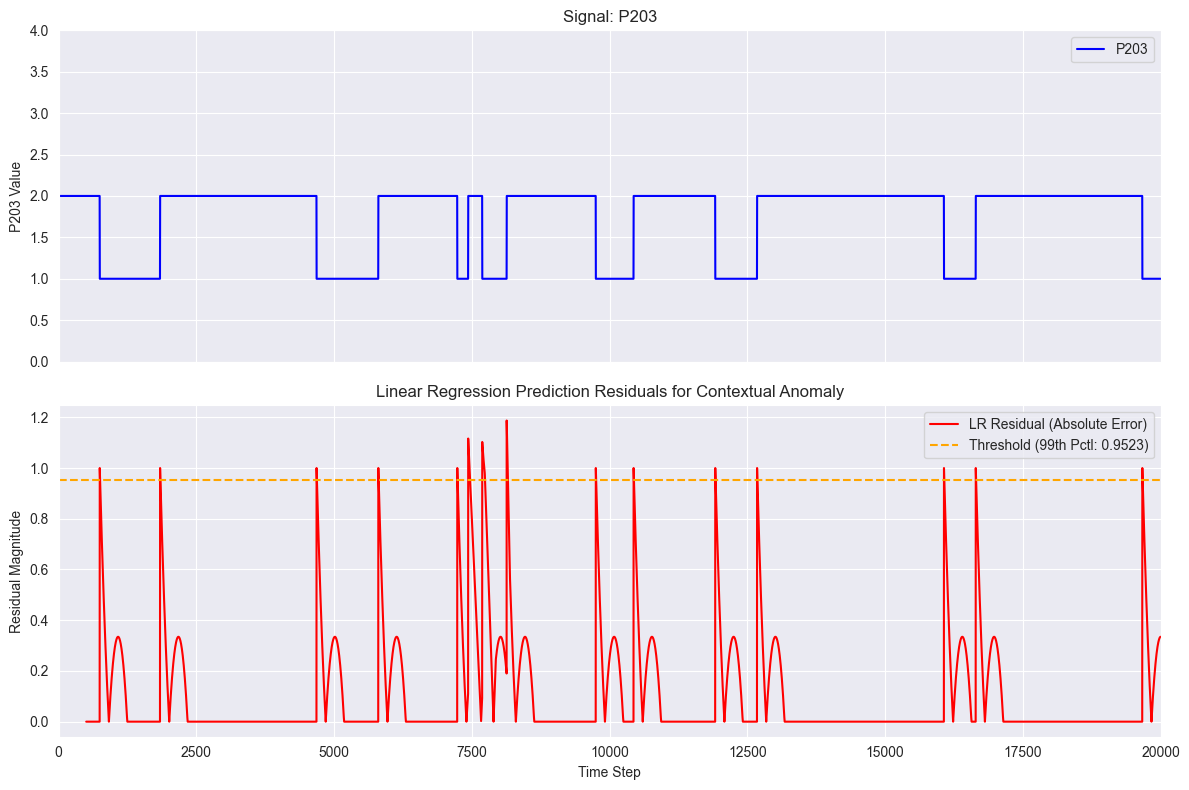

In [83]:
test_residuals_series = pd.Series(test_residuals, index=test_df_no_time.index)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

axes[0].plot(test_df_no_time[signal], label=signal, color='blue')
axes[0].set_title(f'Signal: {signal}')
axes[0].set_ylabel(f'{signal} Value')
axes[0].set_xlim(x_range[0], x_range[1])
axes[0].set_ylim(y_range[0], y_range[1])
axes[0].legend()
axes[0].grid(True)

axes[1].plot(test_residuals_series, label='LR Residual (Absolute Error)', color='red')
# Calculate the threshold only on the computed residuals
valid_residuals = test_residuals_series.dropna()
if not valid_residuals.empty:
    threshold = valid_residuals.quantile(0.99)
    axes[1].axhline(y=threshold, color='orange', linestyle='--', label=f'Threshold (99th Pctl: {threshold:.4f})')

axes[1].set_title('Linear Regression Prediction Residuals for Contextual Anomaly')
axes[1].set_xlabel('Time Step')
axes[1].set_ylabel('Residual Magnitude')
axes[1].set_xlim(x_range[0], x_range[1])
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

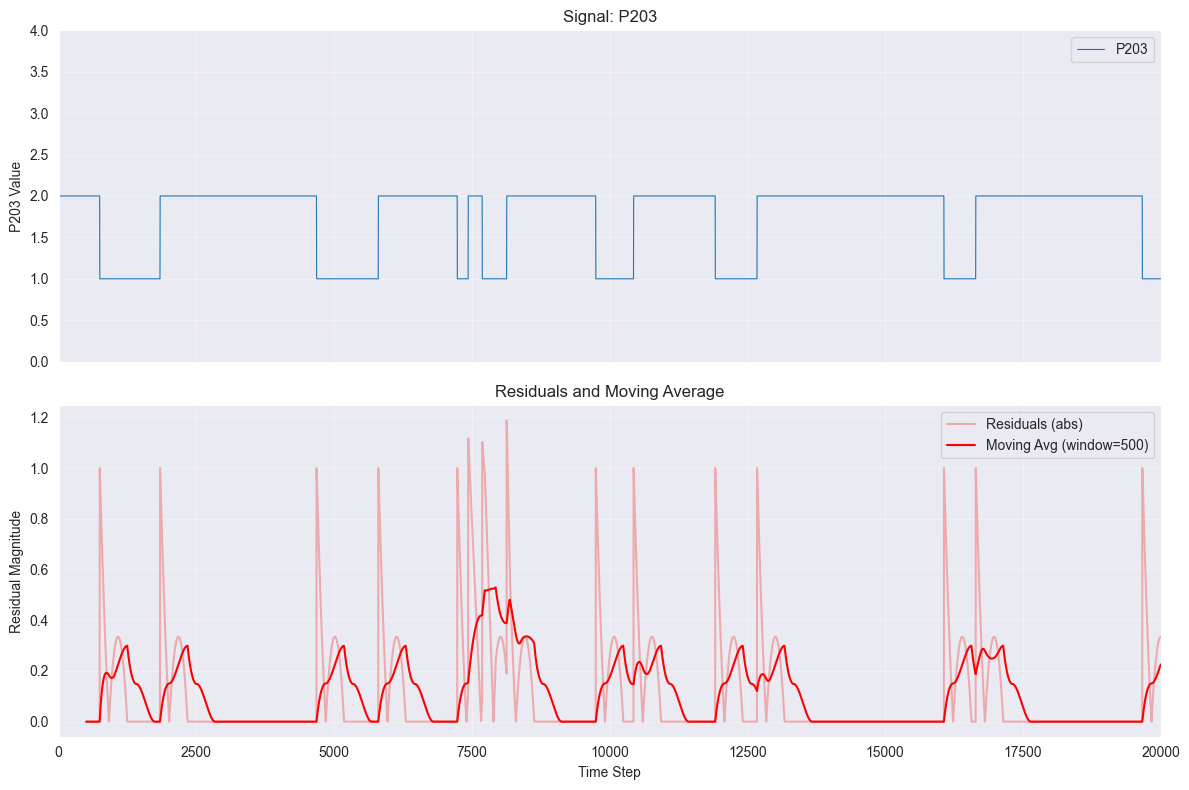

In [84]:
MA_WINDOW = 500  # moving average window (in samples)

rolling_ma = test_residuals_series.rolling(window=MA_WINDOW, min_periods=1).mean()

# Plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# Top: original signal
axes[0].plot(test_df_no_time[signal], label=signal, color='tab:blue', linewidth=0.8)
axes[0].set_title(f'Signal: {signal}')
axes[0].set_ylabel(f'{signal} Value')
axes[0].set_xlim(x_range[0], x_range[1])
axes[0].set_ylim(y_range[0], y_range[1])
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Bottom: residuals and moving average
axes[1].plot(test_residuals_series, label='Residuals (abs)', color='lightcoral', alpha=0.6)
axes[1].plot(rolling_ma, label=f'Moving Avg (window={MA_WINDOW})', color='red', linewidth=1.5)
axes[1].set_title('Residuals and Moving Average')
axes[1].set_xlabel('Time Step')
axes[1].set_ylabel('Residual Magnitude')
axes[1].set_xlim(x_range[0], x_range[1])
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
